In [207]:
# import basic
import pandas as pd
import numpy as np

# sklearn libs 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
from sklearn import metrics

# Stats Model
from statsmodels import stats

# Graph related
import matplotlib.pyplot as plt 
import seaborn as sns

# Os related
import os
os.chdir('/Users/shrinivasd/4Upgrad-Git-Self-projects/Salary Prediction Data - Simple linear regression/')

# Misc libs

In [208]:
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [210]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [211]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [212]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


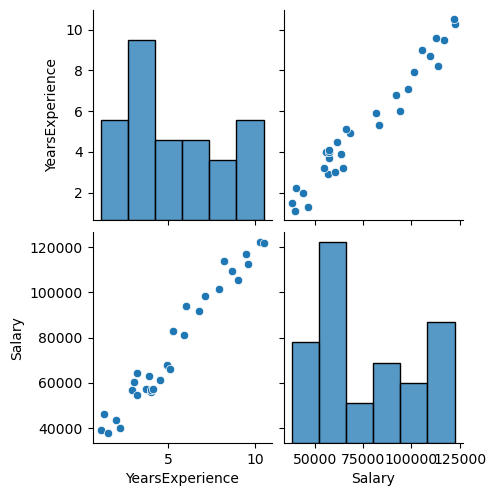

In [213]:
sns.pairplot(data=df, vars=['YearsExperience','Salary'])
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

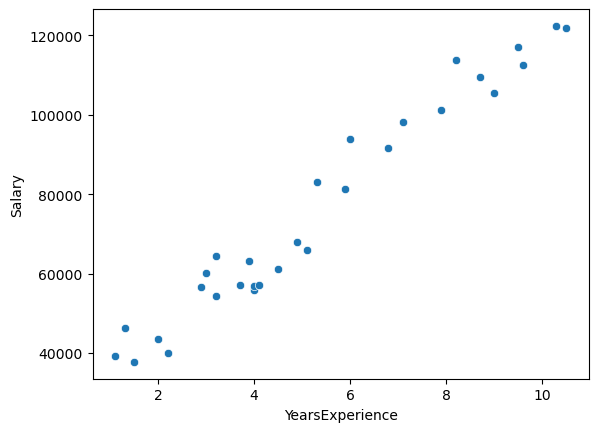

In [214]:
sns.scatterplot(data=df, x='YearsExperience',y='Salary')

In [215]:
scaler = MinMaxScaler()
df[['YearsExperience','Salary']] = scaler.fit_transform(df[['YearsExperience','Salary']])
df.head()

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514


In [216]:
target = 'Salary'
X = df.loc[:,df.columns != target]
y = df.loc[:,df.columns == target]

In [217]:
X.head()

,YearsExperience
0,0.000000
1,0.021277
2,0.042553
3,0.095745
4,0.117021


In [218]:
y.head()

,Salary
0,0.019041
1,0.100094
2,0.000000
3,0.068438
4,0.025514


In [219]:
type(X)

pandas.core.frame.DataFrame

In [220]:
type(y)

pandas.core.frame.DataFrame

In [221]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [222]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24, 1)
(24, 1)
(6, 1)
(6, 1)


In [223]:
lr = LinearRegression()

In [224]:
lr.fit(X_train, y_train)

LinearRegression()

In [225]:
lr.intercept_

array([-0.00835186])

In [226]:
lr.coef_

array([[1.03399724]])

In [227]:
y_pred = lr.predict(X_test)
y_pred

array([[0.03564803],
       [1.00364544],
       [0.32164726],
       [0.29964732],
       [0.91564568],
       [0.82764591]])

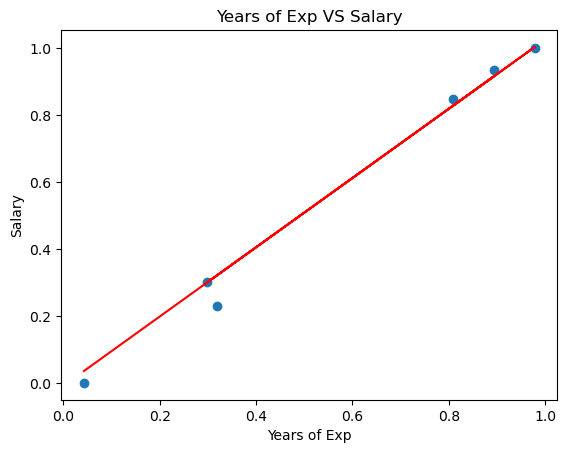

In [228]:
plt.scatter(x=X_test, y=y_test)
plt.plot(X_test, y_pred, color='red')

plt.title("Years of Exp VS Salary")
plt.xlabel("Years of Exp")
plt.ylabel("Salary")
plt.show()

In [229]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
print("MAE : ", MAE)
print("MAE : ", MSE)
print("R2 - Predictions : ", r2)

MAE :  0.028894074758404293
MAE :  0.00178915133835136
R2 - Predictions :  0.988169515729126


In [230]:
base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = y_pred
base

,actual,predictions
2,0.000000,0.035648
28,1.000000,1.003645
13,0.228561,0.321647
10,0.301051,0.299647
26,0.935956,0.915646
24,0.846917,0.827646


/var/folders/rr/h6v8pysn2vqgg26j399_qlhc0000gn/T/ipykernel_5009/2857605317.py:1: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  residuals = np.subtract(X_train, y_train)


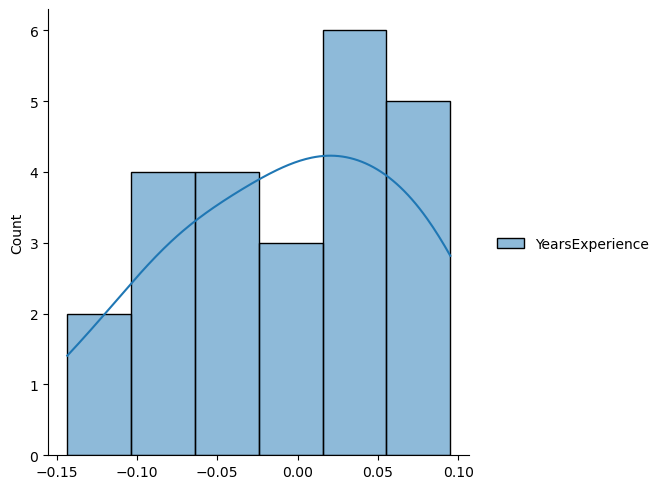

In [231]:
residuals = np.subtract(X_train, y_train)

sns.displot(residuals, kde = True)